## Pandasql

In [ ]:
! pip install pandasql

In [1]:
import pandas as pd
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

iris = pd.read_csv('../Day3-Pandas/iris-data-index-column.csv', index_col=0, header=0)
display(iris)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
d1,5.1,3.5,1.4,0.2,Iris-setosa
a1,4.9,3.0,1.4,0.2,Iris-setosa
d2,7.0,3.2,4.7,1.4,Iris-versicolor
a2,6.4,3.2,4.5,1.5,Iris-versicolor
d3,6.3,3.3,6.0,2.5,Iris-virginica
a3,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
mul = 20
div = 30
#query = 'select upper(Class) as Class, Sepal_Length * {0} as S_Length, Sepal_Width / {1} as S_Width from iris'.format(5, 100)
query = f'select upper(Class) as Class, Sepal_Length * {mul} as S_Length, Sepal_Width / {div} as S_Width from iris'
print(query)
iris2 = pysqldf(query)
display(iris2)



select upper(Class) as Class, Sepal_Length * 20 as S_Length, Sepal_Width / 30 as S_Width from iris


,Class,S_Length,S_Width
0,IRIS-SETOSA,102.0,0.116667
1,IRIS-SETOSA,98.0,0.100000
2,IRIS-VERSICOLOR,140.0,0.106667
3,IRIS-VERSICOLOR,128.0,0.106667
4,IRIS-VIRGINICA,126.0,0.110000
5,IRIS-VIRGINICA,116.0,0.090000


## LAB 1: ## 

### There are also some built-in sample datasets that can be used to play around with in pandasql

#### 1.	Use the meat DataFrame below, and find how many records have a null value for the broilers field 
#### 2.	Try to do the same using standard pandas commands

<br>
<details><summary>Click for <b>hint</b></summary>
<p>
For pandasql, use the name of the variable as a table name in the FROM clause
<br>
Use SQL SELECT COUNT and a null test in the WHERE clause
<br>
For standard pandas, get the Series for the broilers column using [] notation
<br>
Use isnull() method to get a Series of True/False for the rows that are null
<br>
Use that to get just the rows from the DataFrame that are null
<br>
Use the len() function to see how many there are
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

meat = ps.load_meat()
#display(meat)

print(pysqldf('select count(*) from meat where broilers is null'))

print(len(meat['broilers'][meat['broilers'].isnull()]))

```
</p>
</details>

In [12]:
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

meat = ps.load_meat()
#display(meat)


print(pysqldf('select count(*) from meat where broilers is null'))
x = pysqldf('select count(*) from meat where broilers is null')
#print(type(x))
print(x.iloc[0,0])

print(len(meat['broilers'][meat['broilers'].isnull()]))

print(meat['broilers'].isnull().sum())

   count(*)
0       192
192
192
192


## Central Tendency
Pandas is a module that contains the DataFrame object.
Here we are looking at the three measures of central tendency and the count of how many objects in the DataFrame.
Then we show each unique value and how many times it occurs.

In [16]:
import pandas as pd
df = pd.DataFrame([9,10,10,11,11,11,12,12,12,13,13,13,13,14], columns=['Age'])

print('mode',df.Age.mode()[0])
print("Mean", df.Age.mean(), "Median", df.Age.median(), "Mode", df.Age.mode()[0], "Count", df.Age.count())
print(df.Age.value_counts())



mode 13
Mean 11.714285714285714 Median 12.0 Mode 13 Count 14
13    4
12    3
11    3
10    2
14    1
9     1
Name: Age, dtype: int64


## LAB 2: ## 

### Find the three central tendencies for beef in the meat DataFrame
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Try to use . syntax and [] syntax as alternatives to get the beef column
<br>
Remember mode is trickier, try using both mode and value_counts to make sure you understand how to get the mode
<br>
Of the three central tendencies, which makes the most sense to use in this case?
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
print(meat.beef.mean(), meat['beef'].median(), meat.beef.mode()[0])
print(meat['beef'].mode())
print(meat.beef.value_counts())

```
</p>
</details>

In [24]:
#display(meat)
print(meat.beef.mean(), meat['beef'].median(), meat.beef.mode()[0])
#print(meat['beef'].mode())
#print(meat.beef.value_counts())
print(meat.beef.count())


1683.4633615477626 1853.0 1857.0
827


## Plotting
We can visualize what the data looks like with a number of different plots.
Boxplots are useful to see the big picture on a series of numbers.
We can see min, max, mean, and the inter quartile range.

## Box Plot
Shows the minimum, maximum, mean, and inter quartile range.

In [26]:
df2 = pd.DataFrame([(9, 19), (10, 11),(10,33),(11,32),(11, 34),(11, 34),(12, 10),(12, 33),(12,10),(13,22),(13, 12),(13, 24),(13, 33),(14, 44)], columns=['Age', 'whatever'])
display(df2)

,Age,whatever
0,9,19
1,10,11
2,10,33
3,11,32
4,11,34
5,11,34
6,12,10
7,12,33
8,12,10
9,13,22


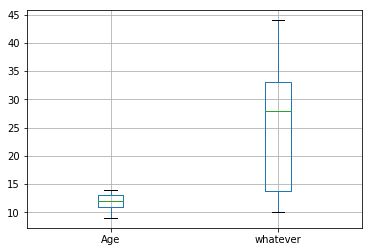

In [28]:
%matplotlib inline
import matplotlib as mp
from matplotlib import pyplot as plt
#plt.ylim(8,15)
df2.boxplot()



## Histogram
Good for looking at how many items fall within a range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aae97f080>]],
      dtype=object)

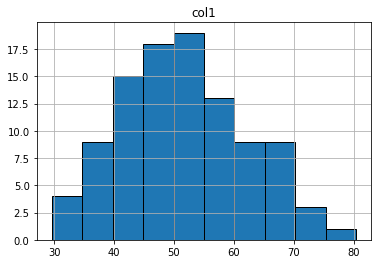

In [30]:
%matplotlib inline
import numpy as np
#df = pd.DataFrame(np.random.rand(253, 1) * 254, columns=['col1'])
df = pd.DataFrame(np.random.normal(50, 10, 100), columns=['col1'])
df.hist(histtype='bar', ec='black')



## Bar Chart
Useful for seeing how many items are in each category.

        Age
Gender     
Female    3
Male      2


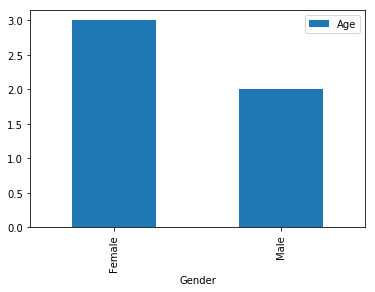

In [31]:
df = pd.DataFrame([('Male', 10),('Male', 11), ('Female', 11), ('Female', 12), ('Female', 12)], columns=['Gender','Age'])
x = df.groupby('Gender').count()
print(x)
x.plot(kind='bar')

## LAB 3: ## 

### Create a boxplot to compare beef, veal, and pork
### Run a histogram on the same three
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Select the three columns from meat using the [[]] syntax 
<br>
Run a boxplot method on the DataFrame of three columns
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
%matplotlib inline
somemeat = meat[['beef', 'veal', 'pork']]
somemeat.boxplot()

somemeat.hist(histtype='bar', ec='black')

```
</p>
</details>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aae57e390>,
      dtype=object)

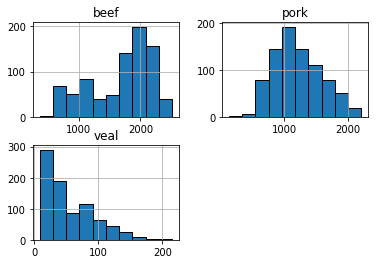

In [38]:
%matplotlib inline
somemeat = meat[['beef', 'veal', 'pork']]
#somemeat = meat[['beef',  'pork']]
#somemeat.boxplot()

somemeat.hist(histtype='bar', ec='black')



In [43]:
meat.describe()
#meat[['beef', 'veal', 'pork', 'lamb_and_mutton']].mean()


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


## Replacing Null Values with the Central Tendency

In [98]:
import pandas as pd
fatal = pd.read_csv('2012_Workplace_Fatalities_by_State.csv')
print(fatal.columns)
fatal.columns = ['State', 'NumberOfFatalities', 'RateOfFatalities', 'StateRank', 'NumberOfInjuries', 'InjuriesRate', 'PenaltiesAvg', 'PenaltiesRank', 'Inspectors', 'YearsToInspectEachWorkplaceOnce', 'StateFederal']
print(fatal.PenaltiesRank.mean())
print(fatal.PenaltiesRank[48:])
print(fatal.PenaltiesRank[48:].isnull())

#x = fatal.PenaltiesRank.fillna(fatal.PenaltiesRank.mean())
#fatal['NewCol'] = x
#print(type(x), x)
#fatal = fatal.dropCol('PenaltiesRank')

#fatal.PenaltiesRank = fatal.PenaltiesRank.fillna(fatal.PenaltiesRank.mean())
#fatal.PenaltiesRank.fillna(fatal.PenaltiesRank.mean(), inplace = True)

#display(fatal)

print(fatal.shape)
print(fatal.PenaltiesRank[48:])
fatal.dropna(axis = 0, inplace = True)
print(fatal.shape)
#display(fatal)

# fatal.drop(columns=['NumberOfFatalities'], inplace = True)
# display(fatal)

Index(['State', 'Number of Fatalities, 2012', 'Rate of Fatalities, 2012',
       'State Rank, Fatalities 2012', 'Number of Injuries/Illnesses 2012',
       'Injuries/Illnesses 2012 Rate', 'Penalties FY 2013 (Average $)',
       'Penalties FY 2013 (Rank)', 'Inspectors',
       'Years to Inspect Each Workplace Once', 'State or Federal Program'],
      dtype='object')
25.5
48    10.0
49     1.0
50     NaN
51     NaN
52     NaN
53     NaN
Name: PenaltiesRank, dtype: float64
48    False
49    False
50     True
51     True
52     True
53     True
Name: PenaltiesRank, dtype: bool
(54, 11)
48    10.0
49     1.0
50     NaN
51     NaN
52     NaN
53     NaN
Name: PenaltiesRank, dtype: float64
(42, 11)


## LAB 4: ## 

### Calculate the central tendency for broilers
### Replace the null values for broilers with that central tendency
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Use mean for the central tendency
<br>
Use fillna to replace the null values for broilers. Try it with inplace False first, then True to see the different syntax
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
meat = ps.load_meat()
broilersct = meat.broilers.mean()
print(broilersct)
display(meat)
meat2 = meat.broilers.fillna(broilersct, inplace = False)
display(meat)
display(meat2)
meat.broilers = meat2
display(meat)

meat = ps.load_meat()
meat.broilers.fillna(meat.broilers.mean(), inplace = True)
display(meat)
```
</p>
</details>

In [61]:
meat = ps.load_meat()
broilersct = meat.broilers.mean()
meat2 = meat.broilers.fillna(broilersct, inplace = False)
display(meat)
display(meat2)
meat.broilers = meat2
# display(meat)

# meat = ps.load_meat()
# meat.broilers.fillna(meat.broilers.mean(), inplace = True)
# display(meat)

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
5,1944-06-01,658.0,125.0,962.0,79.0,NaN,NaN,NaN
6,1944-07-01,662.0,142.0,796.0,82.0,NaN,NaN,NaN
7,1944-08-01,787.0,175.0,748.0,87.0,NaN,NaN,NaN
8,1944-09-01,774.0,182.0,678.0,91.0,NaN,NaN,NaN
9,1944-10-01,834.0,215.0,777.0,100.0,NaN,NaN,NaN


0      1516.58252
1      1516.58252
2      1516.58252
3      1516.58252
4      1516.58252
5      1516.58252
6      1516.58252
7      1516.58252
8      1516.58252
9      1516.58252
10     1516.58252
11     1516.58252
12     1516.58252
13     1516.58252
14     1516.58252
15     1516.58252
16     1516.58252
17     1516.58252
18     1516.58252
19     1516.58252
20     1516.58252
21     1516.58252
22     1516.58252
23     1516.58252
24     1516.58252
25     1516.58252
26     1516.58252
27     1516.58252
28     1516.58252
29     1516.58252
          ...    
797    3139.70000
798    3057.70000
799    3200.00000
800    3238.30000
801    3183.70000
802    3124.40000
803    3175.00000
804    3127.50000
805    2852.40000
806    3310.40000
807    2973.50000
808    3251.10000
809    3284.60000
810    3030.90000
811    3330.30000
812    3180.40000
813    3096.80000
814    2907.10000
815    2855.80000
816    3091.80000
817    2954.00000
818    3043.70000
819    2993.80000
820    3278.00000
821    310

### Now suppose you want to do that for several columns. Let's use the apply function to run the fillna function on each column

In [79]:
meat = ps.load_meat()
cols = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']
meat[cols] = meat[cols].apply(lambda x : x.fillna(x.mean()))
display(meat)


,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,1516.58252,43.033566,292.814646
1,1944-02-01,713.0,77.0,1169.0,72.0,1516.58252,43.033566,292.814646
2,1944-03-01,741.0,90.0,1128.0,75.0,1516.58252,43.033566,292.814646
3,1944-04-01,650.0,89.0,978.0,66.0,1516.58252,43.033566,292.814646
4,1944-05-01,681.0,106.0,1029.0,78.0,1516.58252,43.033566,292.814646
5,1944-06-01,658.0,125.0,962.0,79.0,1516.58252,43.033566,292.814646
6,1944-07-01,662.0,142.0,796.0,82.0,1516.58252,43.033566,292.814646
7,1944-08-01,787.0,175.0,748.0,87.0,1516.58252,43.033566,292.814646
8,1944-09-01,774.0,182.0,678.0,91.0,1516.58252,43.033566,292.814646
9,1944-10-01,834.0,215.0,777.0,100.0,1516.58252,43.033566,292.814646


## Add and Remove Columns to a DataFrame

In [76]:
# print(fatal.columns)
# fatal.insert(11, 'ProgramType', pd.Categorical(fatal['StateFederal']).codes)
# display(fatal)
# print(fatal[['ProgramType', 'StateFederal']][:5])
# fatal.drop(['StateFederal'], axis=1, inplace=True)
# print(fatal.columns)

fatal.StateFederal = pd.Categorical(fatal['StateFederal']).codes
display(fatal)

,State,NumberOfFatalities,RateOfFatalities,StateRank,NumberOfInjuries,InjuriesRate,PenaltiesAvg,PenaltiesRank,Inspectors,YearsToInspectEachWorkplaceOnce,StateFederal
0,"South Carolina\n(33.99882060100049, -81.045367...",63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,1
1,"West Virginia\n(38.665511497000466, -80.712639...",49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,0
2,"Massachusetts\n(42.27687306500047, -72.0826898...",44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,0
3,"Tennessee\n(35.680943063000484, -85.7744864219...",101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,1
4,"Oklahoma\n(35.472034350000456, -97.52106845499...",97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,0
5,"Illinois\n(40.48501278700047, -88.99770813999965)",146.0,2.5,10.0,124900.0,3.2,1876.0,23.0,74.0,137.0,0
6,"Nebraska\n(41.64104043900045, -99.36571864599966)",48.0,5.2,38.0,24300.0,3.9,2565.0,5.0,9.0,128.0,0
7,"Delaware\n(39.00883351400046, -75.57773943699965)",14.0,3.1,18.0,7900.0,2.8,2406.0,6.0,5.0,175.0,0
8,"Hawaii\n(21.30485166200043, -157.85774691599974)",20.0,3.4,22.0,13700.0,3.8,964.0,39.0,20.0,79.0,1
9,"Iowa\n(42.469404401000475, -93.81648936699969)",97.0,6.6,44.0,45600.0,4.5,790.0,43.0,26.0,98.0,1


## Change Data Type

In [80]:
# print(fatal.NumberOfFatalities[48:])
# fatal.NumberOfFatalities = fatal.NumberOfFatalities.fillna(0).astype(int)
# print(fatal.NumberOfFatalities[48:])

#fatal[['RateOfFatalities','StateRank']].astype(int)
#fatal[['StateRank', 'NumbnerOfFatalities']] = fatal[['StateRank', 'NumbnerOfFatalities']].astype(int)
display(fatal)

KeyError: "['NumbnerOfFatalities'] not in index"

## Rescale Data

In [81]:
from sklearn import preprocessing as pp
x = fatal.NumberOfFatalities.astype(float)
print(x.mean(), x.std(), x.min(), x.max())
print(x[10:15])
print(pp.scale(x, with_mean = False, with_std = False)[10:15])
print(pp.scale(x, with_mean = True, with_std = False)[10:15])
print(pp.scale(x, with_mean = False, with_std = True)[10:15])
print(pp.scale(x, with_mean = True, with_std = True)[10:15])
print(pp.scale(x, with_mean = True, with_std = True)[10:15])

r = pp.scale(x, with_mean = True, with_std = True)
fatal.NumberOfFatalities = r
print('rescaled', fatal.NumberOfFatalities[10:15])


98.02380952380952 95.46560818488078 11.0 536.0
10     60.0
12    149.0
13     88.0
14    137.0
15    115.0
Name: NumberOfFatalities, dtype: float64
[ 60. 149.  88. 137. 115.]
[-38.02380952  50.97619048 -10.02380952  38.97619048  16.97619048]
[0.63611703 1.57969063 0.93297165 1.45246722 1.21922431]
[-0.40312655  0.54044705 -0.10627193  0.41322364  0.17998073]
[-0.40312655  0.54044705 -0.10627193  0.41322364  0.17998073]
rescaled 10   -0.403127
12    0.540447
13   -0.106272
14    0.413224
15    0.179981
Name: NumberOfFatalities, dtype: float64


## LAB 5: ## 

### Right after the last lab, we used the apply function to replace null values for each column with the central tendency of that column. Using a similar technique, see if you can rescale those same columns centered around the mean and std.
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Use apply and a lambda to that uses pp.scale
<br>
<br>
</p>
</details>
<details><summary>Click for <b>code</b></summary>
<p>

```python
from sklearn import preprocessing as pp
meat = ps.load_meat()
cols = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']
meat[cols] = meat[cols].apply(lambda x : x.fillna(x.mean()))
meat[cols] = meat[cols].apply(lambda x : pp.scale(x, with_mean = True, with_std = True))

display(meat)
```
</p>
</details>

In [ ]:
from sklearn import preprocessing as pp
meat = ps.load_meat()
cols = ['beef', 'veal', 'pork', 'lamb_and_mutton', 'broilers', 'other_chicken', 'turkey']
meat[cols] = meat[cols].apply(lambda x : x.fillna(x.mean()))

display(meat)


## Concat Data

In [86]:
df1 = pd.DataFrame([('Male', 10),('Male', 11), ('Female', 11), ('Female', 12), ('Female', 12)], columns=['Gender','Age'])
df2 = pd.DataFrame([('Male', 20),('Male', 21), ('Female', 21), ('Female', 22)], columns=['Gender','Age'])
# display(df1)
# display(df2)
df = pd.concat([df1, df2])
#display(df)
df3 = pd.DataFrame([('John', 'Smith'), ('Joe','Average'), ('Jane', 'Doe'), ('Jill', 'Hill')], columns = ['First', 'Last'])
#display(df3)
df = pd.concat([df1, df3], axis = 1)
display(df)


,Gender,Age,First,Last
0,Male,10,John,Smith
1,Male,11,Joe,Average
2,Female,11,Jane,Doe
3,Female,12,Jill,Hill
4,Female,12,NaN,NaN


## Merge or Join DataFrames

In [91]:
person_data = {
        'id': ['1', '2', '3', '4', '5'],
        'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'], 
        'last_name': ['Smith', 'Miller', 'Sprat', 'Wonderland', 'Blow']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'last_name'])

skill_data = {
    'id' : ['1', '1', '2', '3', '3', '3', '5', '6'],
    'skill' : ['C++', 'Java', 'Java', 'C++', 'Java', 'Python', 'Python', 'Java']
}
df2 = pd.DataFrame(skill_data, columns = ['id', 'skill'])

display(df1)
display(df2)
#display(pd.merge(df1, df2, on = 'id', how='left'))
display(pd.merge(df1, df2, how = 'left' ))



,id,first_name,last_name
0,1,John,Smith
1,2,Sue,Miller
2,3,Jack,Sprat
3,4,Alice,Wonderland
4,5,Joe,Blow


,id,skill
0,1,C++
1,1,Java
2,2,Java
3,3,C++
4,3,Java
5,3,Python
6,5,Python
7,6,Java


,id,first_name,last_name,skill
0,1,John,Smith,C++
1,1,John,Smith,Java
2,2,Sue,Miller,Java
3,3,Jack,Sprat,C++
4,3,Jack,Sprat,Java
5,3,Jack,Sprat,Python
6,4,Alice,Wonderland,NaN
7,5,Joe,Blow,Python


## Convert Categorical Data

In [93]:
person_data = { 'id': ['1', '2', '3', '4', '5'],       
     'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'],        
     'status': ['Active', 'Active', 'Pending', 'Cancelled', 'Cancelled']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'status'])
display(df1)
df1.status = pd.Categorical(df1.status).codes
display(df1)

,id,first_name,status
0,1,John,Active
1,2,Sue,Active
2,3,Jack,Pending
3,4,Alice,Cancelled
4,5,Joe,Cancelled


,id,first_name,status
0,1,John,0
1,2,Sue,0
2,3,Jack,2
3,4,Alice,1
4,5,Joe,1


## Dummy Encoded

In [95]:
person_data = { 'id': ['1', '2', '3', '4', '5'],       
     'first_name': ['John', 'Sue', 'Jack', 'Alice', 'Joe'],        
     'status': ['Active', 'Active', 'Pending', 'Cancelled', 'Cancelled']}
df1 = pd.DataFrame(person_data, columns = ['id', 'first_name', 'status'])
display(df1)

# dummies = pd.get_dummies(df1.status, drop_first = True)
# df2 = pd.concat([df1[['id','first_name']], dummies], axis = 1)
# print(df2)

dummies = pd.get_dummies(df1.status, drop_first = True)
display(dummies)
df3 = pd.concat([df1[['id','first_name']], dummies], axis = 1)
display(df3)



,id,first_name,status
0,1,John,Active
1,2,Sue,Active
2,3,Jack,Pending
3,4,Alice,Cancelled
4,5,Joe,Cancelled


,Cancelled,Pending
0,0,0
1,0,0
2,0,1
3,1,0
4,1,0


,id,first_name,Cancelled,Pending
0,1,John,0,0
1,2,Sue,0,0
2,3,Jack,0,1
3,4,Alice,1,0
4,5,Joe,1,0


## Split Data into Train and Test Sets

In [102]:
# print ('Split 1')
# train = fatal.sample(frac=0.8,random_state=200)
# test = fatal[~fatal.index.isin(train.index)]
# # x0 = fatal.Pe
# # x1 = train.ProgramType
# # x2 = test.ProgramType

# print(train.shape, test.shape)
# print(x0.value_counts()/x0.count())
# print(x1.value_counts()/x1.count())
# print(x2.value_counts()/x2.count())
# print(fatal.shape, train.shape, test.shape)

from sklearn.model_selection import train_test_split
print ('Split 2')
train, test = train_test_split(fatal, train_size=0.4, test_size = .2)
print(train.shape, test.shape)
# x0 = fatal.ProgramType
# x1 = train.ProgramType
# x2 = test.ProgramType
# print(x0.value_counts()/x0.count())
# print(x1.value_counts()/x1.count())
# print(x2.value_counts()/x2.count())
# print(fatal.shape, train.shape, test.shape)


Split 2
(16, 11) (9, 11)


## LAB 6: ## 

### Split the meat DataFrame into a 70/30 split
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Use train_test_split, it's way easier
<br>
<br>
</p>
</details>
<details><summary>Click for <b>code</b></summary>
<p>

```python
from sklearn.model_selection import train_test_split
meatTrain, meatTest = train_test_split(meat, test_size = 0.3)
print(len(meatTrain), len(meatTest))
```
</p>
</details>

### Natural Language Processing

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

DIR = 'text'

def corpus_from_dir(folder):
    import os
    ret = dict(docs = [open(os.path.join(folder,f)).read() for f in os.listdir(folder)],
               ColNames = map(lambda x: x.split('.')[0], os.listdir(folder)))
    return ret

def tdm_df(docs, colNames = None, **kwargs):

    #initialize the  vectorizer
    vectorizer = CountVectorizer(**kwargs)
    x1 = vectorizer.fit_transform(docs)
    #create dataFrame
    df = pd.DataFrame(x1.toarray().transpose(), index = vectorizer.get_feature_names())
    if colNames is not None:
        df.columns = colNames

    return df

corpus = corpus_from_dir(DIR)
print(corpus)
df = tdm_df(docs = corpus['docs'], colNames = corpus['ColNames'], stop_words = 'english')  
display(df)


{'docs': ['  Once upon a midnight dreary, while I pondered, weak and weary,\n  Over many a quaint and curious volume of forgotten lore--\n  While I nodded, nearly napping, suddenly there came a tapping,\n  As of some one gently rapping, rapping at my chamber door.\n  "\'Tis some visitor," I muttered, "tapping at my chamber door--\n                                     Only this and nothing more."\n\n', 'THE thousand injuries of Fortunato I had borne as I best could; but\nwhen he ventured upon insult, I vowed revenge. You, who so well know the\nnature of my soul, will not suppose, however, that I gave utterance to\na threat. _At length_ I would be avenged; this was a point definitively\nsettled--but the very definitiveness with which it was resolved,\nprecluded the idea of risk. I must not only punish, but punish with\nimpunity. A wrong is unredressed when retribution overtakes its\nredresser. It is equally unredressed when the avenger fails to make\nhimself felt as such to him who has d

,raven,cask,masque
_at,0,1,0
aid,0,0,1
avatar,0,0,1
avenged,0,1,0
avenger,0,1,0
ban,0,0,1
best,0,1,0
bleeding,0,0,1
blood,0,0,2
body,0,0,1


## Homework: ## 

### Load the sales.csv file found in Day4
### Replace the nulls with the means and rescale the numeric columns 
### Add a column for a numeric encoded version of color
### Add a series of dummy coded columns for color
<br>
<details><summary>Click for <b>hint</b></summary>
<p>
Import the correct package to do rescaling
<br>
Remember to add a new column you can't use property or dot syntax to refer to a column
<br>
Remember to add Dummy Coded values you are adding more than one column so you need another method to add them to the DataFrame
<br>
<br>
</p>
</details>
